In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

customer = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/customer_churn.csv')

In [ ]:
print(customer.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
# Data Manipulation

# a. Find the total number of male customers
num_male_customers = customer[customer['gender'] == 'Male'].shape[0]
print(f'Total number of male customers: {num_male_customers}')

Total number of male customers: 3555


In [ ]:
# b. Find the total number of customers whose Internet Service is ‘DSL’
num_dsl_customers = customer[customer['InternetService'] == 'DSL'].shape[0]
print(f'Total number of customers with Internet Service as DSL: {num_dsl_customers}')

Total number of customers with Internet Service as DSL: 2421


In [ ]:
# c. Extract all the Female senior citizens whose Payment Method is Mailed check
new_customer = customer[(customer['gender'] == 'Female') &
                        (customer['SeniorCitizen'] == 1) &
                        (customer['PaymentMethod'] == 'Mailed check')]

print(f'Number of Female senior citizens with Mailed check payment method: {new_customer.shape[0]}')

Number of Female senior citizens with Mailed check payment method: 50


In [ ]:
# d. Extract all those customers whose tenure is less than 10 months or TotalCharges is less than $500
# Convert 'TotalCharges' to numeric, handling errors by coercing them to NaN
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors='coerce')

new_customer_2 = customer[(customer['tenure'] < 10) | (customer['TotalCharges'] < 500)]

print(f'Number of customers with tenure < 10 months or TotalCharges < $500: {new_customer_2.shape[0]}')

Number of customers with tenure < 10 months or TotalCharges < $500: 2233


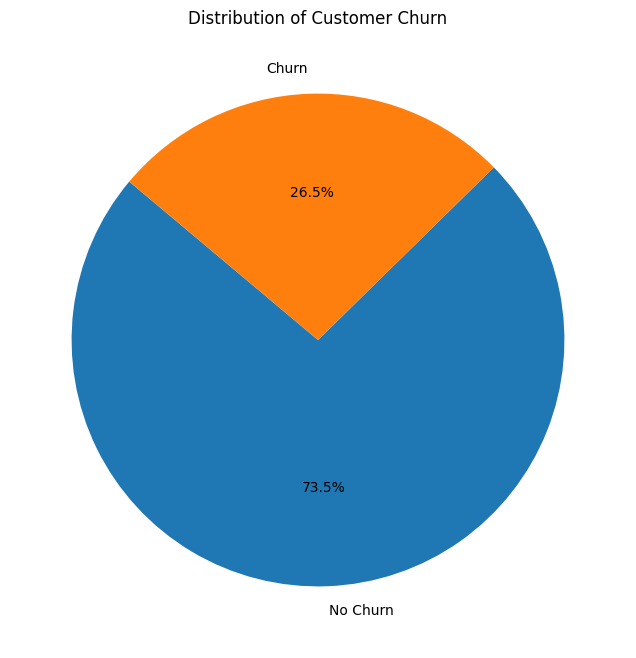

In [ ]:
# Data Visualization
# a. Build a pie-chart to show the distribution of customers who would be churning out
churn_distribution = customer['Churn'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_distribution, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Churn')
plt.show()

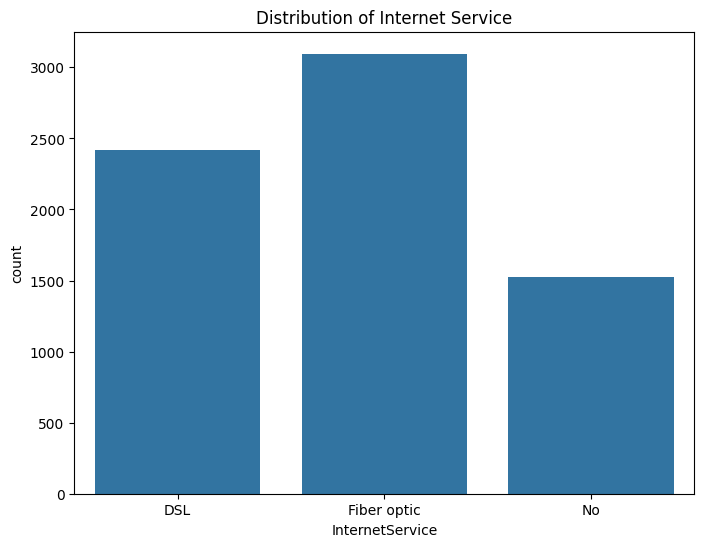

In [ ]:
# b. Build a bar-plot to show the distribution of ‘Internet Service’
plt.figure(figsize=(8, 6))
sns.countplot(data=customer, x='InternetService')
plt.title('Distribution of Internet Service')
plt.show()

In [ ]:
# Model Building
# Prepare data for model
X = customer[['tenure']]  # Feature for model 1
y = customer['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target to binary

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Model 1: Sequential model with 12 nodes, 1 hidden layer with 8 nodes
def build_model_1():
    model = Sequential([
        Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_1 = build_model_1()
history_1 = model_1.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
124/124 - 2s - 14ms/step - accuracy: 0.5690 - loss: 1.8454 - val_accuracy: 0.7556 - val_loss: 0.4968
Epoch 2/150
124/124 - 0s - 2ms/step - accuracy: 0.7328 - loss: 0.5175 - val_accuracy: 0.7556 - val_loss: 0.4921
Epoch 3/150
124/124 - 0s - 2ms/step - accuracy: 0.7328 - loss: 0.5174 - val_accuracy: 0.7556 - val_loss: 0.4996
Epoch 4/150
124/124 - 0s - 2ms/step - accuracy: 0.7328 - loss: 0.5180 - val_accuracy: 0.7556 - val_loss: 0.4993
Epoch 5/150
124/124 - 0s - 2ms/step - accuracy: 0.7328 - loss: 0.5169 - val_accuracy: 0.7556 - val_loss: 0.4955
Epoch 6/150
124/124 - 0s - 2ms/step - accuracy: 0.7328 - loss: 0.5176 - val_accuracy: 0.7556 - val_loss: 0.4918
Epoch 7/150
124/124 - 0s - 3ms/step - accuracy: 0.7328 - loss: 0.5177 - val_accuracy: 0.7556 - val_loss: 0.4919
Epoch 8/150
124/124 - 0s - 2ms/step - accuracy: 0.7323 - loss: 0.5175 - val_accuracy: 0.7556 - val_loss: 0.4954
Epoch 9/150
124/124 - 0s - 2ms/step - accuracy: 0.7320 - loss: 0.5179 - val_accuracy: 0.7556 - val_loss

In [ ]:
# Evaluate Model 1
y_pred_1 = (model_1.predict(X_test) > 0.5).astype("int32")
print(f'Confusion Matrix for Model 1:\n{confusion_matrix(y_test, y_pred_1)}')

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix for Model 1:
[[1392  147]
 [ 379  195]]


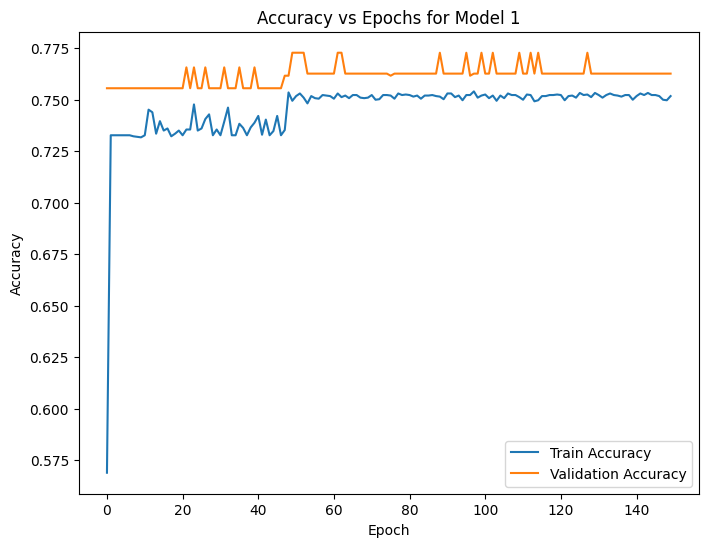

In [ ]:
# Plot Accuracy vs Epochs for Model 1
plt.figure(figsize=(8, 6))
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs for Model 1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Model 2: Sequential model with dropout layers
def build_model_2():
    model = Sequential([
        Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(8, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_2 = build_model_2()
history_2 = model_2.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


124/124 - 2s - 13ms/step - accuracy: 0.4381 - loss: 5.0141 - val_accuracy: 0.7556 - val_loss: 0.6124
Epoch 2/150
124/124 - 0s - 4ms/step - accuracy: 0.6146 - loss: 1.6750 - val_accuracy: 0.7556 - val_loss: 0.7279
Epoch 3/150
124/124 - 0s - 3ms/step - accuracy: 0.6179 - loss: 1.2884 - val_accuracy: 0.7556 - val_loss: 0.6781
Epoch 4/150
124/124 - 0s - 2ms/step - accuracy: 0.6405 - loss: 0.9893 - val_accuracy: 0.7556 - val_loss: 0.5854
Epoch 5/150
124/124 - 0s - 3ms/step - accuracy: 0.6600 - loss: 0.7771 - val_accuracy: 0.7556 - val_loss: 0.5225
Epoch 6/150
124/124 - 0s - 2ms/step - accuracy: 0.6876 - loss: 0.6624 - val_accuracy: 0.7556 - val_loss: 0.5009
Epoch 7/150
124/124 - 0s - 2ms/step - accuracy: 0.6833 - loss: 0.6666 - val_accuracy: 0.7556 - val_loss: 0.4935
Epoch 8/150
124/124 - 0s - 2ms/step - accuracy: 0.7008 - loss: 0.6022 - val_accuracy: 0.7556 - val_loss: 0.5017
Epoch 9/150
124/124 - 0s - 2ms/step - accuracy: 0.7023 - loss: 0.5990 - val_accuracy: 0.7556 - val_loss: 0.5090
Epo

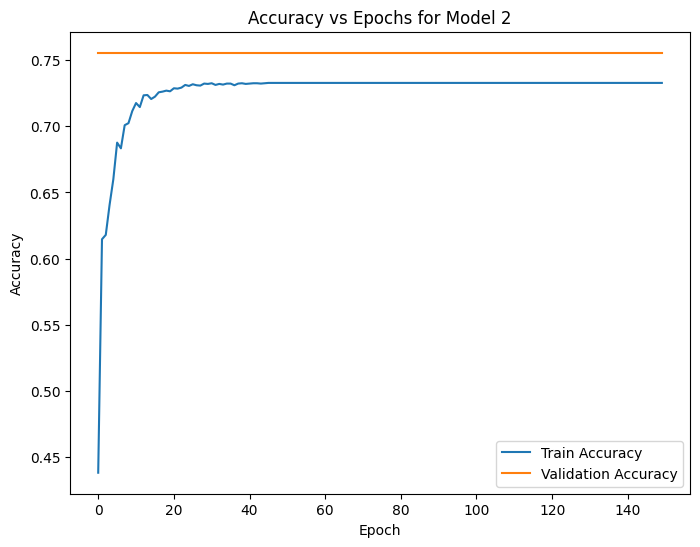

In [ ]:
# Plot Accuracy vs Epochs for Model 2
plt.figure(figsize=(8, 6))
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs for Model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Model 3: Sequential model with multiple features
X = customer[['tenure', 'MonthlyCharges', 'TotalCharges']]  # Features for model 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def build_model_3():
    model = Sequential([
        Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_3 = build_model_3()
history_3 = model_3.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
124/124 - 5s - 41ms/step - accuracy: 0.6468 - loss: nan - val_accuracy: 0.7556 - val_loss: nan
Epoch 2/150
124/124 - 0s - 3ms/step - accuracy: 0.7328 - loss: nan - val_accuracy: 0.7556 - val_loss: nan
Epoch 3/150
124/124 - 0s - 4ms/step - accuracy: 0.7328 - loss: nan - val_accuracy: 0.7556 - val_loss: nan
Epoch 4/150
124/124 - 0s - 3ms/step - accuracy: 0.7328 - loss: nan - val_accuracy: 0.7556 - val_loss: nan
Epoch 5/150
124/124 - 0s - 3ms/step - accuracy: 0.7328 - loss: nan - val_accuracy: 0.7556 - val_loss: nan
Epoch 6/150
124/124 - 0s - 2ms/step - accuracy: 0.7328 - loss: nan - val_accuracy: 0.7556 - val_loss: nan
Epoch 7/150
124/124 - 0s - 2ms/step - accuracy: 0.7328 - loss: nan - val_accuracy: 0.7556 - val_loss: nan
Epoch 8/150
124/124 - 0s - 2ms/step - accuracy: 0.7328 - loss: nan - val_accuracy: 0.7556 - val_loss: nan
Epoch 9/150
124/124 - 0s - 3ms/step - accuracy: 0.7328 - loss: nan - val_accuracy: 0.7556 - val_loss: nan
Epoch 10/150
124/124 - 0s - 2ms/step - accura

In [ ]:
# Evaluate Model 3
y_pred_3 = (model_3.predict(X_test) > 0.5).astype("int32")
print(f'Confusion Matrix for Model 3:\n{confusion_matrix(y_test, y_pred_3)}')

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix for Model 3:
[[1539    0]
 [ 574    0]]


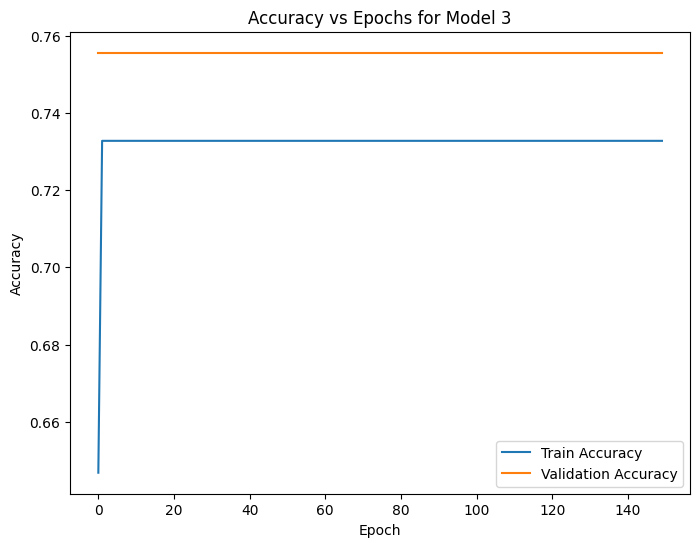

In [ ]:
# Plot Accuracy vs Epochs for Model 3
plt.figure(figsize=(8, 6))
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs for Model 3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()